In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\chinm\AppData\Local\Temp\ipykernel_29040\2495895133.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# read The csv file
df = pd.read_csv("20230329093832Mobile-Addiction-.csv")

In [3]:
df.head()

,Timestamp,Full Name :,Gender :,Do you use your phone to click pictures of class notes?,Do you buy books/access books from your mobile?,Does your phone's battery last a day?,"When your phone's battery dies out, do you run for the charger?",Do you worry about losing your cell phone?,Do you take your phone to the bathroom?,Do you use your phone in any social gathering (parties)?,...,Do you check your phone just before going to sleep/just after waking up?,Do you keep your phone right next to you while sleeping?,"Do you check emails, missed calls, texts during class time?",Do you find yourself relying on your phone when things get awkward?,Are you on your phone while watching TV or eating food?,Do you have a panic attack if you leave your phone elsewhere?,You don't mind responding to messages or checking your phone while on date?,For how long do you use your phone for playing games?,Can you live a day without phone ?,whether you are addicted to phone?
0,2023/02/17 2:21:53 PM GMT+5:30,Dabbeta Ganesh Kumar,MALE,Yes,Yes,Yes,Yes;No,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,<2 hours,NaN,NaN
1,2023/02/24 4:28:34 PM GMT+5:30,Mir Junaid Rasool,MALE,Yes,No,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,<2 hours,No,Maybe
2,2023/02/24 4:34:02 PM GMT+5:30,Dev,MALE,Yes,No,No,Yes,Yes,Yes,Yes,...,Yes,Yes,No,Yes,Yes,Yes,Yes,>2 hours,No,Yes
3,2023/02/27 3:32:22 PM GMT+5:30,A.RuthvikDev,MALE,Yes,No,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,Yes,No,Yes,No,<2 hours,Yes,No
4,2023/02/27 3:33:44 PM GMT+5:30,Vishnu,MALE,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,NaN,No,No,No,No,No,<2 hours,Yes,No


In [4]:
df['whether you are addicted to phone?'].value_counts()

whether you are addicted to phone?
No       322
Yes      176
Maybe      1
Name: count, dtype: int64

In [5]:
#preprocessing data.
col = df[['Timestamp', 'Full Name :', 'Gender :',
       'Do you use your phone to click pictures of class notes?',
       'Do you buy books/access books from your mobile?',
       "Does your phone's battery last a day?",
       "When your phone's battery dies out, do you run for the charger?",
       'Do you worry about losing your cell phone?',
       'Do you take your phone to the bathroom?',
       'Do you use your phone in any social gathering (parties)?',
       'Do you often check your phone without any notification? ',
       'Do you check your phone just before going to sleep/just after waking up?',
       'Do you keep your phone right next to you while sleeping?',
       'Do you check emails, missed calls, texts during class time? ',
       'Do you find yourself relying on your phone when things get awkward?',
       'Are you on your phone while watching TV or eating food?',
       'Do you have a panic attack if you leave your phone elsewhere?',
       "You don't mind responding to messages or checking your phone while on date? ",
       'For how long do you use your phone for playing games?',
       'Can you live a day without phone ? ',
       'whether you are addicted to phone?']]

In [6]:
for i in col:
    df[i].fillna(method='ffill',inplace=True)

C:\Users\chinm\AppData\Local\Temp\ipykernel_29040\1060100489.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(method='ffill',inplace=True)
C:\Users\chinm\AppData\Local\Temp\ipykernel_29040\1060100489.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[i].fillna(method='ffill',inplace=True)


In [7]:
df['Can you live a day without phone ? '].fillna(method='bfill',inplace=True)
df['whether you are addicted to phone?'].fillna(method='bfill',inplace=True)

C:\Users\chinm\AppData\Local\Temp\ipykernel_29040\3450501767.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Can you live a day without phone ? '].fillna(method='bfill',inplace=True)
C:\Users\chinm\AppData\Local\Temp\ipykernel_29040\3450501767.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['whether you are addicted to phone?'].fillna(method='bfill',inplace=True)


In [8]:
le = LabelEncoder()

In [9]:
for i in col:
    df[i]=le.fit_transform(df[i])

In [10]:
# Delete The unknown column
df.drop('Timestamp', axis = 1,inplace = True)
df.drop('Full Name :',  axis = 1,inplace = True)

In [11]:
x = df.drop(['whether you are addicted to phone?'], axis = 1) 
y = df['whether you are addicted to phone?']

In [12]:
Oversample = RandomOverSampler(random_state=72)
x_sm, y_sm = Oversample.fit_resample(x[:100],y[:100])

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.3, random_state= 72)

In [14]:
from sklearn.ensemble import RandomForestClassifier
re = RandomForestClassifier(random_state=72)
re.fit(x_train,y_train)
re_pred = re.predict(x_test)
ac = accuracy_score(y_test,re_pred)

Precision: 0.8997588132289293
Recall: 0.8983050847457628
F1 Score: 0.8977183833116035


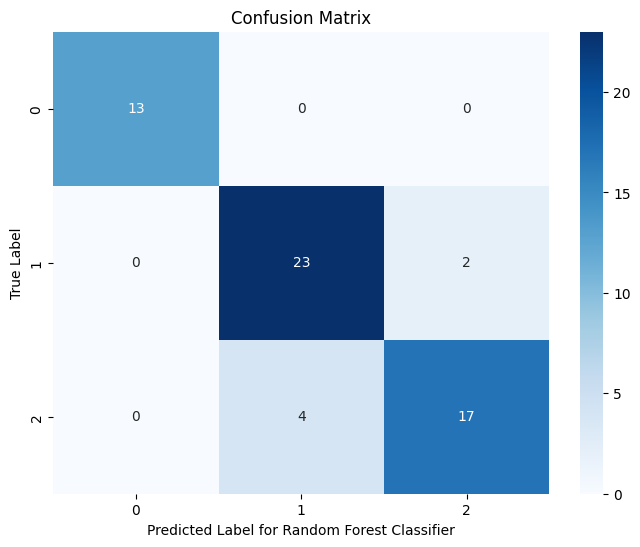

In [20]:

# Calculate precision
precision = precision_score(y_test, re_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, re_pred, average='weighted')
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, re_pred, average='weighted')
print("F1 Score:", f1)

# Draw confusion matrix
cm = confusion_matrix(y_test, re_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label for Random Forest Classifier')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [16]:
from sklearn.tree import DecisionTreeClassifier
de = DecisionTreeClassifier()
de.fit(x_train,y_train)
de_pred = de.predict(x_test)
ac1 = accuracy_score(y_test,de_pred)

Precision: 0.8464711685050669
Recall: 0.847457627118644
F1 Score: 0.8445120479018784


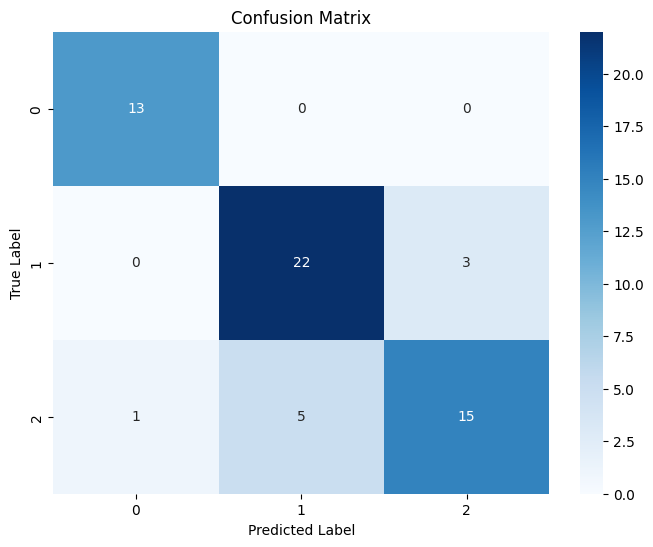

In [17]:
precision = precision_score(y_test, de_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, de_pred, average='weighted')
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, de_pred, average='weighted')
print("F1 Score:", f1)

# Draw confusion matrix
cm = confusion_matrix(y_test, de_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label for Decision Tree Classifier')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [18]:
from sklearn.linear_model import LogisticRegression
le = LogisticRegression()
le.fit(x_train,y_train)
le_pred = le.predict(x_test)
ac2 = accuracy_score(y_test,le_pred)

Precision: 0.7995578481945468
Recall: 0.7966101694915254
F1 Score: 0.7969953775038521


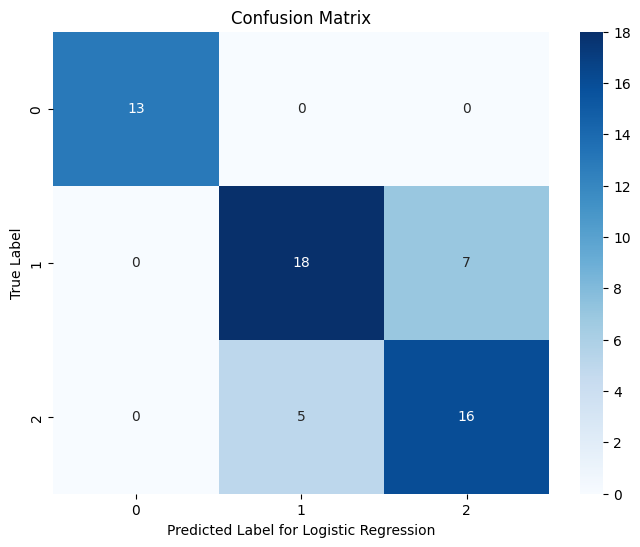

In [21]:
precision = precision_score(y_test, le_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, le_pred, average='weighted')
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, le_pred, average='weighted')
print("F1 Score:", f1)

# Draw confusion matrix
cm = confusion_matrix(y_test, le_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label for Logistic Regression')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()